<a href="https://colab.research.google.com/github/danieldrumonds/DataScience/blob/main/Previs%C3%A3o_de_Vendas_com_Or%C3%A7amento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Vendas com Orçamento de Marketing

Prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio.

### **Passo a Passo de um Projeto de Ciência de Dados**
- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

### **1) Importar a Base de Dados**

In [2]:
import pandas as pd
tabela = pd.read_csv("advertising.csv")
display(tabela)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### **2) Análise Exploratória**
Vamos tentar visualizar como as informações de cada item estão distribuídas

Vamos ver a correlação entre cada um dos itens

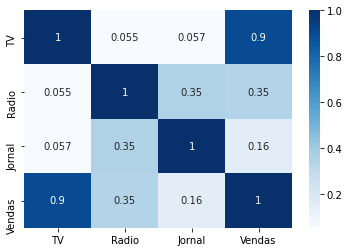

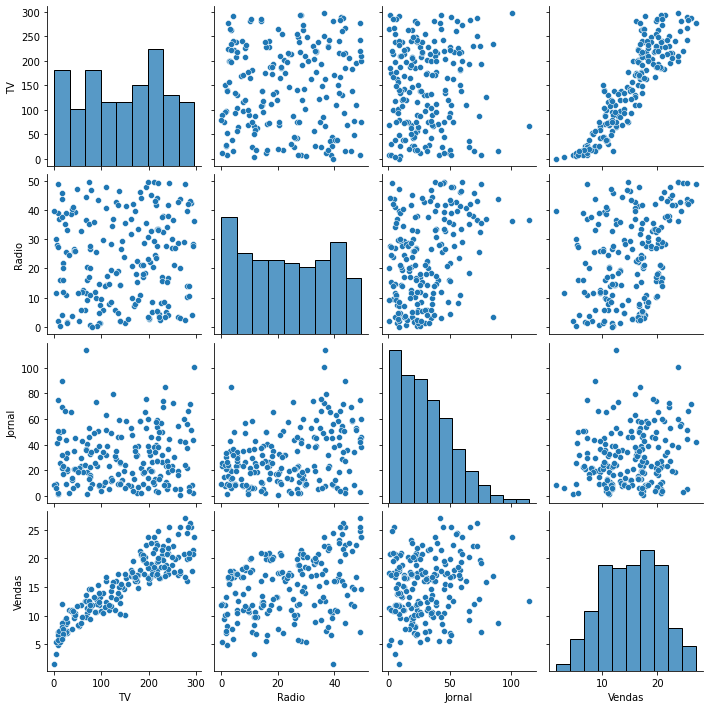

In [22]:
import seaborn as sns #Pacote de gráficos do Python
import matplotlib.pyplot as plt #Pacote de gráficos do Python

sns.heatmap(tabela.corr(), annot=True, cmap="Blues")
# Gráfico Mapa de Calor para verificar correlação entre dados da tabela
# annot=True - Insere o valor da correlação no gráfico
# cmap="Blues" - Alterar cor do gráfico
plt.show()

sns.pairplot(tabela)
plt.show()

# Algumas IA não podem ter correlação forte entre as características

### **3) Preparação dos Dados para Treinamento do Modelo de Machine Learning**
Separando em dados de treino e dados de teste

In [24]:
from sklearn.model_selection import train_test_split 
#Uma das principais bibliotecas de IA / Estou importando apenas o train_test_split aqui

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)
# Em IA se convencionou x para vendas e y para características

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)
# Sempre nesta ordem - a função é padronizada
# test_size=0.3 - Tamanho da amostra para teste = 30% (Tamanho ideal entre 20% e 30%)
# random_state=1 - Separar dados (treino, teste) aleatoriamente, mas ao rodar o codigo novamente terá o mesmo resultado

### **4) Problema de Regressão - Escolhendo os modelos que serão usados**
Regressão Linear

RandomForest (Árvore de Decisão)

In [25]:
# Importa as Inteligências Artificiais
from sklearn.linear_model import LinearRegression #Pacote IA Regressão Linear
from sklearn.ensemble import RandomForestRegressor #Pacote IA Árvore de Decisão

# Cria as Inteligências Artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treina as Inteligências Artificiais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### **5) Teste da AI e Avaliação do Melhor Modelo**
Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [26]:
from sklearn import metrics

# Criar as Previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Comparar os Modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))
# r2_score(A, B) - Informar o A (gabarito) e B (previsões)

0.9071151423684272
0.9635829827721089


### **6) Visualização Gráfica das Previsões**

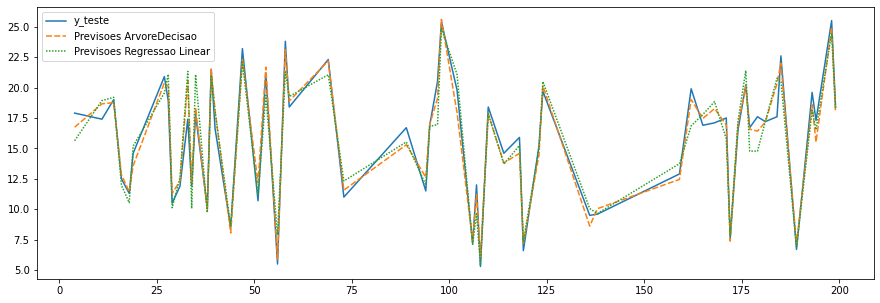

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

### **7) Importancia de cada Variável para Vendas**

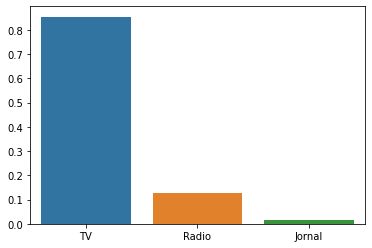

In [30]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# A TV é responsável mais de 80% da previsão de vendas.